In [40]:
############
#This will probably be our approach for clustering on demographics.
##############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import datetime

################
#Global variables
################
current_year=datetime.datetime.today().year
print("You are in the year", current_year)

You are in the year 2022


In [41]:
data=pd.read_csv("HRDataset_v14.csv")
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [42]:
#columns that repeat themselves (we will create our own IDs)
take_out_columns=["MarriedID","MaritalStatusID","GenderID","EmpStatusID","DeptID","PositionID","ManagerID"]
all_columns=data.columns
keep_columns=[col for col in all_columns if col not in take_out_columns]

In [43]:
data=pd.DataFrame(data,columns=keep_columns)
data.head()

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,4,0,62506,0,Production Technician I,MA,1960,07/10/83,...,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,3,0,104437,1,Sr. DBA,MA,2148,05/05/75,...,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,3,0,64955,1,Production Technician II,MA,1810,09/19/88,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,3,0,64991,0,Production Technician I,MA,1886,09/27/88,...,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,3,0,50825,1,Production Technician I,MA,2169,09/08/89,...,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [44]:
#Change states to IDs 
all_states=list(set(data["State"]))
print(all_states)
n_states=len(all_states)
def state_to_id(state):
    return all_states.index(state)

data["StateID"]=data["State"].apply(lambda state: state_to_id(state))
data["StateID"].iloc[:100]

['TN', 'IN', 'UT', 'KY', 'MT', 'OR', 'CT', 'TX', 'FL', 'VT', 'ME', 'WA', 'GA', 'CA', 'OH', 'NH', 'MA', 'ID', 'VA', 'ND', 'PA', 'CO', 'RI', 'AL', 'NV', 'AZ', 'NY', 'NC']


0     16
1     16
2     16
3     16
4     16
      ..
95    16
96    16
97    16
98     6
99     6
Name: StateID, Length: 100, dtype: int64

In [45]:
#Change DOB to years old
def age(dob):
    dob="19"+dob.split("/")[2]
    dob=int(dob)
    return current_year-dob

data["Age"]=data["DOB"].apply(lambda dob: age(dob))
data["Age"].iloc[:100]

0     39
1     47
2     34
3     34
4     33
      ..
95    47
96    42
97    43
98    59
99    54
Name: Age, Length: 100, dtype: int64

In [46]:
#Change sex to ID
def sex_to_id(sex):
    if sex=="F":
        return 1
    else:
        return 0
    
data["SexID"]=data["Sex"].apply(lambda sex: sex_to_id(sex))
data["SexID"].iloc[:100]

0     0
1     0
2     1
3     1
4     1
     ..
95    0
96    0
97    1
98    0
99    1
Name: SexID, Length: 100, dtype: int64

In [47]:
#Change MaritalDesc to ID
all_maritalDesc=list(set(data["MaritalDesc"]))
print(all_maritalDesc)

def maritalDesc_to_ID(marital):
    return all_maritalDesc.index(marital)

data["MaritalDescID"]=data["MaritalDesc"].apply(lambda marital: maritalDesc_to_ID(marital))
data["MaritalDescID"].iloc[:100]

['Married', 'Single', 'Divorced', 'Separated', 'Widowed']


0     1
1     0
2     0
3     0
4     2
     ..
95    0
96    1
97    0
98    1
99    1
Name: MaritalDescID, Length: 100, dtype: int64

In [48]:
#change CitizenDesc to ID
all_CitizenDesc=list(set(data["CitizenDesc"]))
print(all_CitizenDesc)

def CitizenDesc_to_ID(citizen):
    return all_CitizenDesc.index(citizen)

data["CitizenDescID"]=data["CitizenDesc"].apply(lambda citizen: CitizenDesc_to_ID(citizen))
data["CitizenDescID"].iloc[:100]

['Non-Citizen', 'Eligible NonCitizen', 'US Citizen']


0     2
1     2
2     2
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    2
Name: CitizenDescID, Length: 100, dtype: int64

In [49]:
#Change HispanicLatino to ID
all_HispanicLatino=list(set(data["HispanicLatino"])) 
all_HispanicLatino=[person.lower() for person in all_HispanicLatino]
all_HispanicLatino=list(set(all_HispanicLatino)) 
print(all_HispanicLatino)

def HispanicLatino_to_id(person):
    return all_HispanicLatino.index(person.lower())

data["HispanicLatinoID"]=data["HispanicLatino"].apply(lambda person: HispanicLatino_to_id(person))
data["HispanicLatinoID"].iloc[:25]

['yes', 'no']


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    1
Name: HispanicLatinoID, dtype: int64

In [50]:
#change RaceDesc to ID
all_RaceDesc=list(set(data["RaceDesc"]))
print(all_RaceDesc)

def RaceDesc_to_id(person):
    return all_RaceDesc.index(person)

data["RaceDescID"]=data["RaceDesc"].apply(lambda person: RaceDesc_to_id(person))
data["RaceDescID"].iloc[:100]

['Hispanic', 'Asian', 'American Indian or Alaska Native', 'Two or more races', 'Black or African American', 'White']


0     5
1     5
2     5
3     5
4     5
     ..
95    5
96    4
97    5
98    4
99    5
Name: RaceDescID, Length: 100, dtype: int64

In [51]:
###########
#Combine DateofHire and DateofTErmination into years on the job in the future version.
####################
#change DateofHire to years hired
def DateofHire_to_id(doh):
    doh=doh.split("/")[2]
    doh=int(doh)
    return current_year-doh

data["YearsHired"]=data["DateofHire"].apply(lambda doh: DateofHire_to_id(doh))
data["YearsHired"].iloc[:100]

0     11
1      7
2     11
3     14
4     11
      ..
95     8
96    11
97    13
98    11
99    12
Name: YearsHired, Length: 100, dtype: int64

In [52]:
#change DateofTermination to years since terminated contract
def DateofTermination(dot):
    if pd.isna(dot):
        return 0
    else:
        dot=dot.split("/")[2]
        dot=int(dot)
        return current_year-dot

data["YearsTerminated"]=data["DateofTermination"].apply(lambda dot: DateofTermination(dot))
data["YearsTerminated"].iloc[:100]

0      0
1      6
2     10
3      0
4      6
      ..
95     4
96     0
97     0
98     0
99     0
Name: YearsTerminated, Length: 100, dtype: int64

In [53]:
#columns containing demographic variables - they have to be numeric for cluster analysis to work
demo_columns=["Employee_Name","EmpID","StateID","Age","SexID","MaritalDescID",
              "CitizenDescID","HispanicLatinoID","RaceDescID","YearsHired","YearsTerminated"]

demo_data=pd.DataFrame(data,columns=demo_columns)
demo_data.head()

,Employee_Name,EmpID,StateID,Age,SexID,MaritalDescID,CitizenDescID,HispanicLatinoID,RaceDescID,YearsHired,YearsTerminated
0,"Adinolfi, Wilson K",10026,16,39,0,1,2,1,5,11,0
1,"Ait Sidi, Karthikeyan",10084,16,47,0,0,2,1,5,7,6
2,"Akinkuolie, Sarah",10196,16,34,1,0,2,1,5,11,10
3,"Alagbe,Trina",10088,16,34,1,0,2,1,5,14,0
4,"Anderson, Carol",10069,16,33,1,2,2,1,5,11,6


In [54]:
demo_data.isnull().any().any()

False

In [55]:
demo_columns=["StateID","Age","SexID","MaritalDescID","CitizenDescID","HispanicLatinoID","RaceDescID","YearsHired",
              "YearsTerminated"]

demo_data=pd.DataFrame(data,columns=demo_columns)
demo_data.head()

,StateID,Age,SexID,MaritalDescID,CitizenDescID,HispanicLatinoID,RaceDescID,YearsHired,YearsTerminated
0,16,39,0,1,2,1,5,11,0
1,16,47,0,0,2,1,5,7,6
2,16,34,1,0,2,1,5,11,10
3,16,34,1,0,2,1,5,14,0
4,16,33,1,2,2,1,5,11,6


In [56]:
cost=[]
K=range(1,10)
for num_clusters in list(K):
    kmode=KModes(n_clusters=num_clusters,init="random",n_init=5,verbose=1)
    kmode.fit_predict(demo_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1134.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 70, cost: 1007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85, cost: 980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

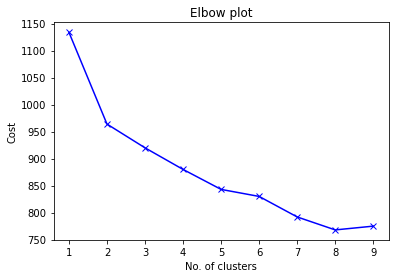

In [57]:
plt.plot(K,cost,"bx-")
plt.xlabel("No. of clusters")
plt.ylabel("Cost")
plt.title("Elbow plot")
plt.show()

In [58]:
#number of clusters is 4 or 7??? Wtf, idk... 
#try KMode with 4 clusters first
kmode4=KModes(n_clusters=4,init="random",n_init=5,verbose=1)
clusters4=kmode4.fit_predict(demo_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 85, cost: 868.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 69, cost: 906.0
Run 2, iteration: 2/100, moves: 8, cost: 906.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 131, cost: 885.0
Run 3, iteration: 2/100, moves: 22, cost: 874.0
Run 3, iteration: 3/100, moves: 4, cost: 874.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 101, cost: 905.0
Run 4, iteration: 2/100, moves: 1, cost: 905.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 84, cost: 894.0
Best run was number 1


In [59]:
print(clusters4)

[0 0 3 3 3 0 0 0 1 0 1 1 0 0 0 0 3 3 0 2 0 2 3 3 3 0 1 2 3 1 0 1 1 1 3 0 0
 2 0 1 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 3 3 2 0 0 3 3 0 0 3 1 0 1 0 0 0 2 1
 3 3 0 3 0 3 3 0 0 0 0 0 1 1 2 3 0 0 3 0 3 0 0 3 0 0 0 1 1 1 1 1 0 0 0 0 2
 1 1 3 3 0 2 2 0 3 1 0 3 0 0 3 0 3 0 3 0 3 1 3 0 3 3 1 2 1 2 1 0 3 1 0 1 3
 0 0 3 3 3 0 1 0 0 3 2 3 0 0 2 2 0 0 0 3 3 0 1 2 2 1 1 0 0 3 1 3 2 3 2 1 0
 1 0 0 0 3 1 2 0 3 2 0 2 0 0 0 0 1 2 2 0 0 1 2 0 0 0 3 0 0 0 1 3 3 3 1 1 1
 0 1 1 0 3 1 1 0 0 0 1 1 3 1 3 0 3 0 1 0 0 0 0 3 1 0 3 0 1 2 3 3 0 0 2 0 0
 1 2 1 0 3 3 2 1 0 0 0 1 1 0 2 0 0 1 3 0 3 0 1 0 0 0 0 3 0 1 0 0 0 1 3 0 0
 1 0 0 2 0 3 3 1 0 0 0 2 0 0 2]


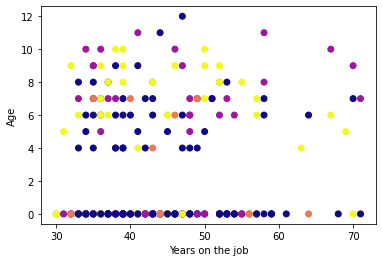

In [60]:
plt.scatter(demo_data["Age"],demo_data["YearsTerminated"],c=clusters4,cmap="plasma")
plt.xlabel("Years on the job")
plt.ylabel("Age")
plt.show()

In [61]:
#try KMode with 7 clusters first
kmode7=KModes(n_clusters=7,init="random",n_init=5,verbose=1)
clusters7=kmode7.fit_predict(demo_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 81, cost: 817.0
Run 1, iteration: 2/100, moves: 31, cost: 817.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 108, cost: 832.0
Run 2, iteration: 2/100, moves: 41, cost: 817.0
Run 2, iteration: 3/100, moves: 5, cost: 817.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 90, cost: 804.0
Run 3, iteration: 2/100, moves: 12, cost: 797.0
Run 3, iteration: 3/100, moves: 2, cost: 797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 138, cost: 819.0
Run 4, iteration: 2/100, moves: 4, cost: 819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 130, cost: 815.0
Run 5, iteration: 2/100, moves: 38, cost: 815.0
Best run was number 3


In [62]:
print(clusters7)

[2 0 0 0 4 2 2 2 6 0 0 1 0 2 0 0 3 4 4 2 2 6 3 4 4 5 3 2 3 6 2 6 5 6 0 0 2
 6 2 6 2 2 0 2 2 1 4 5 2 0 0 0 2 5 0 2 3 3 6 2 2 3 3 5 0 0 6 2 4 0 2 2 6 6
 3 3 2 0 2 3 0 2 0 2 2 4 6 3 6 0 0 2 3 0 0 0 5 3 5 2 2 5 3 4 4 0 2 3 4 0 6
 5 5 3 3 0 6 3 0 4 0 2 0 0 4 3 2 4 0 0 3 3 3 3 2 3 4 0 6 6 3 3 2 0 3 2 3 4
 2 2 3 4 0 2 0 5 0 0 6 0 2 0 6 4 0 0 0 3 0 0 5 3 6 3 4 0 2 3 3 3 6 0 6 6 0
 6 3 1 0 0 1 6 5 3 3 5 2 2 5 0 0 6 6 6 2 2 3 6 0 2 2 0 5 0 5 4 4 3 3 1 3 0
 2 0 4 2 3 0 3 0 0 0 0 4 0 0 0 0 3 3 6 2 0 2 5 3 6 2 0 5 0 6 3 3 0 3 4 2 2
 6 6 0 0 3 3 4 0 0 2 0 3 3 0 6 2 0 3 0 6 4 0 6 0 2 0 2 4 0 0 0 0 2 3 3 3 2
 0 4 2 3 0 0 4 4 2 2 2 4 2 3 2]


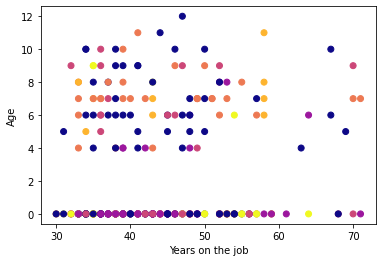

In [63]:
plt.scatter(demo_data["Age"],demo_data["YearsTerminated"],c=clusters7,cmap="plasma")
plt.xlabel("Years on the job")
plt.ylabel("Age")
plt.show()

In [66]:
demo_columns=["Salary","EngagementSurvey","EmpSatisfaction","SpecialProjectsCount","DaysLateLast30","Absences", 
              "PerformanceScore","StateID","Age","SexID","MaritalDescID","CitizenDescID","HispanicLatinoID","RaceDescID",
              "YearsHired","YearsTerminated"]

demo_data=pd.DataFrame(data,columns=demo_columns)
demo_data.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore,StateID,Age,SexID,MaritalDescID,CitizenDescID,HispanicLatinoID,RaceDescID,YearsHired,YearsTerminated
0,62506,4.60,5,0,0,1,Exceeds,16,39,0,1,2,1,5,11,0
1,104437,4.96,3,6,0,17,Fully Meets,16,47,0,0,2,1,5,7,6
2,64955,3.02,3,0,0,3,Fully Meets,16,34,1,0,2,1,5,11,10
3,64991,4.84,5,0,0,15,Fully Meets,16,34,1,0,2,1,5,14,0
4,50825,5.00,4,0,0,2,Fully Meets,16,33,1,2,2,1,5,11,6


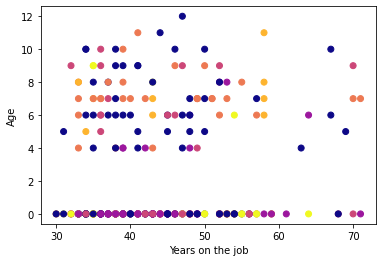

In [67]:
plt.scatter(demo_data["Age"],demo_data["YearsTerminated"],c=clusters7,cmap="plasma")
plt.xlabel("Years on the job")
plt.ylabel("Age")
plt.show()

In [68]:
#change perform
all_performance=list(set(data["PerformanceScore"]))
print(all_performance)
#In order from least performing to best performing: PIP, Needs Improvement, Fully Meets, Exceeds

def performance_to_id(perf):
    if perf=="PIP":
        return 0
    if perf=="Needs Improvement":
        return 1
    if perf=="Fully Meets":
        return 2
    if perf=="Exceeds":
        return 3
    
demo_data["PerformanceScoreID"]=demo_data["PerformanceScore"].apply(lambda perf: performance_to_id(perf))
demo_data["PerformanceScoreID"].iloc[:100]

['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds']


0     3
1     2
2     2
3     2
4     2
     ..
95    0
96    3
97    2
98    2
99    2
Name: PerformanceScoreID, Length: 100, dtype: int64

In [70]:
demo_data["cluster"]=clusters7
demo_data.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore,StateID,Age,SexID,MaritalDescID,CitizenDescID,HispanicLatinoID,RaceDescID,YearsHired,YearsTerminated,PerformanceScoreID,cluster
0,62506,4.60,5,0,0,1,Exceeds,16,39,0,1,2,1,5,11,0,3,2
1,104437,4.96,3,6,0,17,Fully Meets,16,47,0,0,2,1,5,7,6,2,0
2,64955,3.02,3,0,0,3,Fully Meets,16,34,1,0,2,1,5,11,10,2,0
3,64991,4.84,5,0,0,15,Fully Meets,16,34,1,0,2,1,5,14,0,2,0
4,50825,5.00,4,0,0,2,Fully Meets,16,33,1,2,2,1,5,11,6,2,4


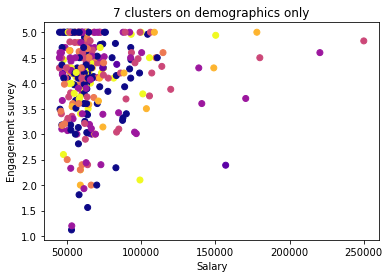

In [75]:
plt.scatter(demo_data["Salary"],demo_data["EngagementSurvey"],c=clusters7,cmap="plasma")
plt.xlabel("Salary")
plt.ylabel("Engagement survey")
plt.title("7 clusters on demographics only")
plt.show()

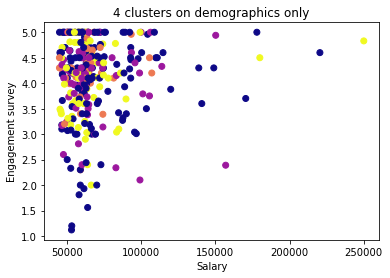

In [76]:
plt.scatter(demo_data["Salary"],demo_data["EngagementSurvey"],c=clusters4,cmap="plasma")
plt.xlabel("Salary")
plt.ylabel("Engagement survey")
plt.title("4 clusters on demographics only")
plt.show()

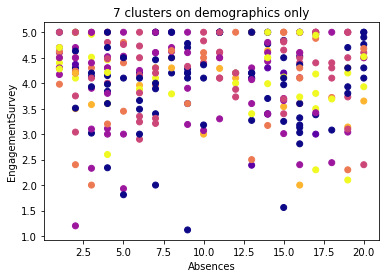

In [80]:
plt.scatter(demo_data["Absences"],demo_data["EngagementSurvey"],c=clusters7,cmap="plasma")
plt.xlabel("Absences")
plt.ylabel("EngagementSurvey")
plt.title("7 clusters on demographics only")
plt.show()

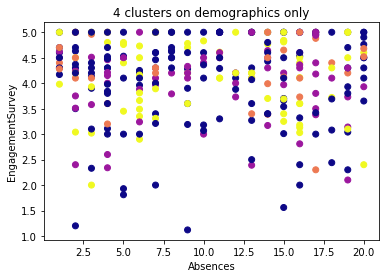

In [81]:
plt.scatter(demo_data["Absences"],demo_data["EngagementSurvey"],c=clusters4,cmap="plasma")
plt.xlabel("Absences")
plt.ylabel("EngagementSurvey")
plt.title("4 clusters on demographics only")
plt.show()

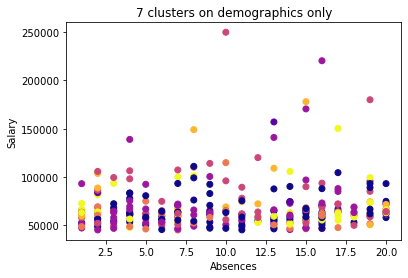

In [82]:
plt.scatter(demo_data["Absences"],demo_data["Salary"],c=clusters7,cmap="plasma")
plt.xlabel("Absences")
plt.ylabel("Salary")
plt.title("7 clusters on demographics only")
plt.show()

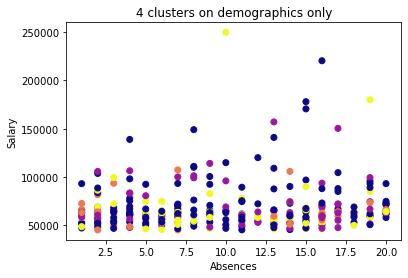

In [83]:
plt.scatter(demo_data["Absences"],demo_data["Salary"],c=clusters4,cmap="plasma")
plt.xlabel("Absences")
plt.ylabel("Salary")
plt.title("4 clusters on demographics only")
plt.show()

In [84]:
data["cluster"]=clusters7
data.to_csv("HR_data_clusters.csv")